Outlier handling in Classification problems

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(42)

global plot_pic
plot_pic = False

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import recall_score,f1_score,precision_score, confusion_matrix

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor



HCV - Hepatitis dataset

In [2]:
 #read dataset
data_hcv = pd.read_csv("hcvdat0.csv")
data_hcv["Sex"] = data_hcv["Sex"].astype('category')
data_hcv["Sex_coded"] = data_hcv["Sex"].cat.codes
data_hcv["Category"] = data_hcv["Category"].astype('category')
data_hcv["category_coded"] = data_hcv["Category"].cat.codes
#Handle NA values
data_hcv['ALP'].fillna(data_hcv['ALP'].mean(), inplace = True)
data_hcv['ALT'].fillna(data_hcv['ALT'].mean(), inplace = True)
data_hcv['ALB'].fillna(data_hcv['ALB'].mean(), inplace = True)
data_hcv['CHOL'].fillna(data_hcv['CHOL'].mean(), inplace = True)
data_hcv['PROT'].fillna(data_hcv['PROT'].mean(), inplace = True)

#remove category -
dataHCV= data_hcv.drop(['Unnamed: 0','Category','Sex'],axis=1)
data_OD = data_hcv.drop(['Unnamed: 0','Category','Sex'],axis=1)
#scale data
scaler = StandardScaler()
data_hcvscale = pd.DataFrame(scaler.fit_transform(dataHCV), columns=dataHCV.columns)


#3=Cirrhosis - category_coded' == 4  
#2=Fibrosis - category_coded' == 3
#1=Hepatitis - category_coded' == 2
#0s=suspect Blood Donor - category_coded' == 1
#0=Blood Donor - category_coded' == 0


#OUTLIER ALGORITHMS
#Run Isolation Forest, OneClassSVM and Local Outlier Factor algorithms

# Create a copy of the dataframe so that the original remains untouched and extract the required curves

anomaly_df_hcv = data_OD.copy()


# Define the inputs for the anomaly detection
anomaly_inputs = ['ALB', 'ALP', 'ALT', 'AST','BIL','CHE','CHOL','CREA','GGT','PROT']

#model with contamination (outlier) fraction of 0.1

model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                           contamination=float(0.1), max_features=1.0, 
                           random_state=42)

model_SVM = OneClassSVM(nu=0.10)

model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

#dictionary of models with names
models = {'IF':model_IF, 
         'OneClassSVM': model_SVM,
         'LOF': model_lof}

#For each model get outlier score
for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df_hcv[anomaly_inputs])
    anomaly_df_hcv[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_hcv[anomaly_inputs])
    anomaly_df_hcv[f'{name}_anomaly'] = model.predict(anomaly_df_hcv[anomaly_inputs])

print('Model Fitting Complete')

# #Display the header row of the final data frame
anomaly_df_hcv.head(5)

Fitting: IF
Fitting: OneClassSVM
Fitting: LOF
Model Fitting Complete


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_coded,category_coded,IF_anomaly_scores,IF_anomaly,OneClassSVM_anomaly_scores,OneClassSVM_anomaly,LOF_anomaly_scores,LOF_anomaly
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0,0.082343,1,0.011428,1,0.373515,1
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0,0.096132,1,1.901346,1,0.583699,1
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0,0.092165,1,3.668489,1,0.363973,1
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0,0.103591,1,2.752458,1,0.523725,1
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0,0.113537,1,3.083122,1,0.573041,1


PARKINSONS dataset

parkinsons

Matrix column entries (attributes): name - ASCII subject name and recording number MDVP:Fo(Hz) - Average vocal fundamental frequency MDVP:Fhi(Hz) - Maximum vocal fundamental frequency MDVP:Flo(Hz) - Minimum vocal fundamental frequency MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude NHR,HNR - Two measures of ratio of noise to tonal components in the voice status - Health status of the subject (one) - Parkinson's, (zero) - healthy RPDE,D2 - Two nonlinear dynamical complexity measures DFA - Signal fractal scaling exponent spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [3]:
data_park = pd.read_csv("parkinsons.data")
data_park["status"] = data_park["status"].astype('category')
data_park["status_coded"] = data_park["status"].cat.codes
#remove name -
dataPark= data_park.drop(['name','status'],axis=1)
scaler = StandardScaler()
data_parkscale = pd.DataFrame(scaler.fit_transform(dataPark), columns=dataPark.columns)
data_parkscale.head()
data_parkscale["status_coded"] = data_parkscale["status_coded"].astype('category')
data_parkscale.columns = ['Fo','Fhi','Flo','Jitter','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2', 'PPE']

#Run the outlier detection algorithms
anomaly_df_park = data_parkscale.copy()

# Define the inputs for the anomaly detection
anomaly_inputs = ['Fo','Fhi','Flo','Jitter','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2', 'PPE']

# contamination (outlier) fraction of 0.1

model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                           contamination=float(0.1), max_features=1.0, 
                           random_state=42)

model_SVM = OneClassSVM(nu=0.10)

model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

models = {'IF':model_IF, 
         'OneClassSVM': model_SVM,
         'LOF': model_lof}

for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df_park[anomaly_inputs])
    anomaly_df_park[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_park[anomaly_inputs])
    anomaly_df_park[f'{name}_anomaly'] = model.predict(anomaly_df_park[anomaly_inputs])

print('Model Fitting Complete')

#Display the header row of the final data frame
anomaly_df_park.head(5)

Fitting: IF
Fitting: OneClassSVM
Fitting: LOF
Model Fitting Complete


,Fo,Fhi,Flo,Jitter,JitterAbs,RAP,PPQ,JitterDDP,Shimmer,ShimmerdB,...,spread1,spread2,D2,PPE,IF_anomaly_scores,IF_anomaly,OneClassSVM_anomaly_scores,OneClassSVM_anomaly,LOF_anomaly_scores,LOF_anomaly
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.480477,-0.210531,0.868886,0.571429,0.078950,1,0.370460,1,0.264281,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.311185,0.275077,1.803605,0.571429,0.025230,1,0.305474,1,0.063101,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.017682,-0.103629,1.402661,0.571429,0.043926,1,0.212694,1,0.079578,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.293840,0.062145,1.806954,0.571429,0.036437,1,0.227858,1,0.070212,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,0.096195,-0.130026,2.267082,0.571429,-0.033939,-1,0.000154,1,-0.060869,-1


Liver Dataset

liver
This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".
1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. liver Patient or not

In [4]:
#Get dataset and pre process
colnames=['Age','Gender','TB','DB','AAP','sgpt','sgot','tp','alb','AGratio','patient']
data_liver = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",  names=colnames, header=None)
data_liver['AGratio'].fillna(data_liver['AGratio'].mean(), inplace = True)
data_liver["Gender"] = data_liver["Gender"].astype('category')
data_liver["Gender_coded"] = data_liver["Gender"].cat.codes
data_liver["patient"] = data_liver["patient"].astype('category')
data_liver["Gender_coded"] = data_liver["Gender_coded"].astype('category')
#remove Gender -
data_liver= data_liver.drop(['Gender'],axis=1)

scaler = StandardScaler()
data_liverscale = pd.DataFrame(scaler.fit_transform(data_liver), columns=data_liver.columns)


#Run outlier algorithms

# Create a copy of the dataframe so that the original remains untouched and extract the required curves

anomaly_df_liver = data_liverscale.copy()


# Define the inputs for the anomaly detection
anomaly_inputs = ['Age','TB','DB','AAP','sgpt','sgot','tp','alb','AGratio','patient','Gender_coded']

#contamination (outlier) fraction of 0.1

model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                           contamination=float(0.1), max_features=1.0, 
                           random_state=42)

model_SVM = OneClassSVM(nu=0.10)

model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

#Create a dictionary of  models
models = {'IF':model_IF, 
         'OneClassSVM': model_SVM,
         'LOF': model_lof}

#Loop through each model
for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df_liver[anomaly_inputs])
    anomaly_df_liver[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_liver[anomaly_inputs])
    anomaly_df_liver[f'{name}_anomaly'] = model.predict(anomaly_df_liver[anomaly_inputs])

print('Model Fitting Complete')

#Display the header row of the final data frame
anomaly_df_liver.head(5)

Fitting: IF
Fitting: OneClassSVM
Fitting: LOF
Model Fitting Complete


,Age,TB,DB,AAP,sgpt,sgot,tp,alb,AGratio,patient,Gender_coded,IF_anomaly_scores,IF_anomaly,OneClassSVM_anomaly_scores,OneClassSVM_anomaly,LOF_anomaly_scores,LOF_anomaly
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898,-0.633595,-1.762281,0.097686,1,0.862190,1,0.423259,1
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697,-0.633595,0.567446,0.041052,1,0.874160,1,0.213370,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323,-0.633595,0.567446,0.088714,1,1.623326,1,0.238312,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351,-0.633595,0.567446,0.143504,1,1.536142,1,0.460729,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144,-0.633595,0.567446,0.075015,1,0.209793,1,0.261421,1


Breast Cancer - Wisconsin dataset

In [5]:

colnames=['code','thickness','UniformitySize','UniformityShape','Adhesion','EpithelialSize','BareNuclei','BlandChromatin','Normal Nucleoli','Mitoses','class']
data_canc = pd.read_csv("breast-cancer-wisconsin.data",  names=colnames, header=None)
data_canc["class"] = data_canc["class"].astype('category')
data_canc["class_coded"] = data_canc["class"].cat.codes
#benign = 0
#malignant = 1
#remove code, class -
data_canc= data_canc.drop(['code','class'],axis=1)
#There are 16 instances in Groups 1 to 6 that contain a single missing 
#   (i.e., unavailable) attribute value, now denoted by "?".
data_canc.drop( data_canc[ data_canc['BareNuclei'] == '?' ].index, inplace=True)

scaler = StandardScaler()
data_cancscale = pd.DataFrame(scaler.fit_transform(data_canc), columns=data_canc.columns)


#Run outlier detection algorithms

# Create a copy of the dataframe so that the original remains untouched and extract the required curves

anomaly_df_canc = data_cancscale.copy()


# Define the inputs for the anomaly detection
anomaly_inputs = ['thickness','UniformitySize','UniformityShape','Adhesion','EpithelialSize','BareNuclei','BlandChromatin','Normal Nucleoli','Mitoses','class_coded']

#contamination (outlier) fraction of 0.1

model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                           contamination=float(0.1), max_features=1.0, 
                           random_state=42)

model_SVM = OneClassSVM(nu=0.10)

model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

#Create a dictionary
models = {'IF':model_IF, 
         'OneClassSVM': model_SVM,
         'LOF': model_lof}

#Loop through each model
for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df_canc[anomaly_inputs])
    anomaly_df_canc[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_canc[anomaly_inputs])

    anomaly_df_canc[f'{name}_anomaly'] = model.predict(anomaly_df_canc[anomaly_inputs])

print('Model Fitting Complete')

#Display the header row of the final data frame
anomaly_df_canc.head(5)

Fitting: IF
Fitting: OneClassSVM
Fitting: LOF
Model Fitting Complete


,thickness,UniformitySize,UniformityShape,Adhesion,EpithelialSize,BareNuclei,BlandChromatin,Normal Nucleoli,Mitoses,class_coded,IF_anomaly_scores,IF_anomaly,OneClassSVM_anomaly_scores,OneClassSVM_anomaly,LOF_anomaly_scores,LOF_anomaly
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,-0.733681,0.226758,1,1.336036,1,1.444750e+09,1
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484,-0.733681,0.009778,1,0.194431,1,1.444750e+09,1
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484,-0.733681,0.212370,1,1.558325,1,1.444750e+09,1
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484,-0.733681,-0.016204,-1,0.000202,1,1.444750e+09,1
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,-0.733681,0.188778,1,1.526531,1,1.444750e+09,1


MAIN function

In [6]:

from tkinter import *

from PIL import Image, ImageTk

import tkinter as tk

def main():
    
        #GUI
    
    lst_display = []
    plot_pic = False
  
    #from tk import *

    import requests

    global img11   

    HEIGHT = 500
    WIDTH = 600

     ###############################################################################################functions
#     #load and preprocess all datasets 
#     hcv_dataset()
#     liver_dataset()
#     park_dataset()
#     canc_dataset()
    #############################################hcv
    def get_IF_hcv():
        IF_hcv_score = run_IF_hcv()
        lst_display = IF_hcv_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################
    def get_lof_hcv():
        lof_hcv_score = run_lof_hcv()
        lst_display = lof_hcv_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################
    def get_svm_hcv():
        svm_hcv_score = run_svm_hcv()
        lst_display = svm_hcv_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################parkinson

    def get_IF_park():
        IF_park_score = run_if_park()
        lst_display = IF_park_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################

    def get_svm_park():
        svm_park_score = run_svm_park()
        lst_display = svm_park_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]


    ############################################

    def get_lof_park():
        lof_park_score = run_lof_park()
        lst_display = lof_park_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]


    ############################################breast cancer

    def get_IF_canc():
        IF_canc_score = run_if_canc()
        lst_display = IF_canc_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################
    def get_lof_canc():
        lof_canc_score = run_lof_canc()
        lst_display = lof_canc_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]
    ##############################

    def get_svm_canc():
        svm_canc_score = run_svm_canc()
        lst_display = svm_canc_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################liver

    def get_IF_liver():
        IF_liver_score = run_if_liver()
        lst_display = IF_liver_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################
    def get_lof_liver():
        lof_liver_score = run_lof_liver()
        lst_display = lof_liver_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################
    def get_svm_liver():
        svm_liver_score = run_svm_liver()
        lst_display = svm_liver_score
        label1['text'] = "Anomaly Scores : "
        label['text'] = lst_display[:20]

    ############################################
    ##########################################################################################
    #CLASSIFICATION
    ##########################################################################################
    def get_classify_hcv():
        classify_hcv_score = classify_hcv()
        label1['text'] = "HCV data - Classification Metrics"
        label['text'] = classify_hcv_score

    def get_classify_liver():
        classify_liver_score = classify_liver()
        label1['text'] = "Liver data - Classification Metrics"
        label['text'] = classify_liver_score

    def get_classify_park():
        classify_park_score = classify_park()
        label1['text'] = "Parkinsons - Classification Metrics"
        label['text'] = classify_park_score

    def get_classify_canc():
        classify_canc_score = classify_canc()
        label1['text'] = "Breast Cancer - Classification Metrics"
        label['text'] = classify_canc_score


    ######################################################################################################

    ##########################################################################################
    #CLASSIFICATION - without outliers
    ##########################################################################################
    def get_classify_nooutlier_hcv():
        classify_hcv_nooutlier_score = classify_hcv_nooutliers()
        label1['text'] = "HCV data - Classification Metrics : (without outliers)"
        label['text'] = classify_hcv_nooutlier_score


    def get_classify_nooutlier_liver():
        classify_liver_nooutlier_score = classify_liver_nooutliers()
        label1['text'] = "Liver data - Classification Metrics : (without outliers)"
        label['text'] = classify_liver_nooutlier_score

    def get_classify_nooutlier_park():
        classify_park_nooutlier_score = classify_park_nooutliers()
        label1['text'] = "Parkinsons - Classification Metrics : (without outliers)"
        label['text'] = classify_park_nooutlier_score


    def get_classify_nooutlier_canc():
        classify_canc_nooutlier_score = classify_canc_nooutliers()
        label1['text'] = "Breast Cancer - Classification Metrics : (without outliers)"
        label['text'] = classify_canc_nooutlier_score


    ######################################################################################################


    def make_label(parent,img):

        label = Label(parent, image=img)
        label.config(background="blue")
        label.pack()



    def plot_IF_hcv():
        print("plot hcv")
        imgIF = PhotoImage(file="IF.png")     
        imgLOF = PhotoImage(file="LOF.png")  
        imgSVM = PhotoImage(file="OneClassSVM.png") 
        filename = PhotoImage(file = "hcv_if.gif")

        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    def plot_svm_hcv():
        print("plot hcv")
        filename = PhotoImage(file = "hcv_svm.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_lof_hcv():
        print("plot hcv")
        filename = PhotoImage(file = "hcv_lof.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_IF_park():
        filename = PhotoImage(file = "park_if.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_svm_park():
        filename = PhotoImage(file = "park_svm.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_lof_park():
        filename = PhotoImage(file = "park_lof.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    def plot_IF_liver():
        filename = PhotoImage(file = "liver_if.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_svm_liver():
        filename = PhotoImage(file = "liver_svm.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_lof_liver():
        filename = PhotoImage(file = "liver_lof.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_IF_canc():
        filename = PhotoImage(file = "canc_if.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_svm_canc():
        filename = PhotoImage(file = "canc_svm.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_lof_canc():
        filename = PhotoImage(file = "canc_lof.gif")
        canv = canvas.create_image(480,600, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    def plot_classify_hcv():
        filename = PhotoImage(file = "hcv_classifyplot.gif") 
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

        liver_classifyplot.gif
    def plot_classify_park():
        filename = PhotoImage(file = "park_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_classify_liver():
        filename = PhotoImage(file = "liver_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)

    def plot_classify_canc():
        filename = PhotoImage(file = "canc_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    ######## classification plot - without outliers

    def plot_classify_nooutlier_hcv():
        filename = PhotoImage(file = "hcv_nooutlier_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    def plot_classify_nooutlier_liver():
        filename = PhotoImage(file = "liver_nooutlier_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    def plot_classify_nooutlier_park():
        filename = PhotoImage(file = "park_nooutlier_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)


    def plot_classify_nooutlier_canc():
        filename = PhotoImage(file = "canc_nooutlier_classifyplot.gif")
        canv = canvas.create_image(480,510, anchor='s', image=filename)
        canv.pack(fill='both', expand = True)
    #############################



    root = tk.Tk()



    canvas = tk.Canvas(root, height=HEIGHT+200, width=WIDTH+200)
    canvas.pack()



    frame = tk.Frame(root,  bd=5)
    frame.place(relx=0.5, rely=0.1, relwidth=0.75, relheight=0.1, anchor='n')


    # Create a Tkinter variable
    tkvar = StringVar(root)

    # Dictionary with options
    choices = { 'HCV','Liver','Parkinsons','Breast Cancer'}
    tkvar.set('HCV') # set the default option


    popupMenu = OptionMenu(frame, tkvar, *choices)
    Label(frame, text="Select a Dataset", font=2).grid(row = 1, column = 1)
    popupMenu.grid(row = 2, column =1)


    # on change dropdown value
    def change_dropdown(*args):
        #print( tkvar.get() )
        dropdown_selected_var =tkvar.get() 


    # link function to change dropdown
    tkvar.trace('w', change_dropdown)


    def IF_all():
        plot_pic = False
        drop_selected_var = tkvar.get()
        if drop_selected_var == 'HCV':
            get_IF_hcv()
            plot_IF_hcv()
        elif drop_selected_var == 'Parkinsons':
            get_IF_park()
            plot_IF_park()
        elif drop_selected_var == 'Liver':
            get_IF_liver()  
            plot_IF_liver()
        elif drop_selected_var == 'Breast Cancer':
            get_IF_canc()
            plot_IF_canc()

    def svm_all():
        plot_pic = False
        drop_selected_var = tkvar.get()
        if drop_selected_var == 'HCV':
            get_svm_hcv()
            plot_svm_hcv()
        elif drop_selected_var == 'Parkinsons':
            get_svm_park()
            plot_svm_park()
        elif drop_selected_var == 'Liver':
            get_svm_liver()
            plot_svm_liver()
        elif drop_selected_var == 'Breast Cancer':
            get_svm_canc()
            plot_svm_canc()

    def lof_all():
        plot_pic = False
        drop_selected_var = tkvar.get()
        if drop_selected_var == 'HCV':
            get_lof_hcv()
            plot_lof_hcv()
        elif drop_selected_var == 'Parkinsons':
            get_lof_park()
            plot_lof_park()
        elif drop_selected_var == 'Liver':
            get_lof_liver()
            plot_lof_liver()
        elif drop_selected_var == 'Breast Cancer':
            get_lof_canc()
            plot_lof_canc()

    def classify_all():
        plot_pic = False
        drop_selected_var = tkvar.get()
        if drop_selected_var == 'HCV':
            get_classify_hcv()
            plot_classify_hcv()
        elif drop_selected_var == 'Parkinsons':
            get_classify_park()
            plot_classify_park()
        elif drop_selected_var == 'Liver':
            get_classify_liver()
            plot_classify_liver()
        elif drop_selected_var == 'Breast Cancer':
            get_classify_canc()
            plot_classify_canc()


    def classify_nooutliers_all():
        plot_pic = False
        drop_selected_var = tkvar.get()
        if drop_selected_var == 'HCV':
            get_classify_nooutlier_hcv()
            plot_classify_nooutlier_hcv()
        elif drop_selected_var == 'Parkinsons':
            get_classify_nooutlier_park()
            plot_classify_nooutlier_park()
        elif drop_selected_var == 'Liver':
            get_classify_nooutlier_liver()
            plot_classify_nooutlier_liver()
        elif drop_selected_var == 'Breast Cancer':
            get_classify_nooutlier_canc()
            plot_classify_nooutlier_canc()


    def plot_all_outliers():
        plot_hcv_outliers()

        #show the images of plots 
        imgIF = PhotoImage(file="IF.png")     
        imgLOF = PhotoImage(file="LOF.png")  
        imgSVM = PhotoImage(file="OneClassSVM.png") 
        plot_pic = True
        return plot_pic


    def clear_all():
        plot_pic = False
        label1['text'] = " "
        label['text'] = " "
        labelPic['text'] = " "
        labelPic.after(1000, labelPic.destroy())

    button = tk.Button(frame, text="Isolation Forest",  fg='saddle brown', font=26, command=lambda: IF_all())
    button.place(relx=0.4, rely= 0.2, relheight=0.3, relwidth=0.2)

    button = tk.Button(frame, text="OneClassSVM", fg='saddle brown',font=26, command=lambda: svm_all())
    button.place(relx=0.4, rely= 0.5, relheight=0.3, relwidth=0.2)

    button = tk.Button(frame, text="Local Outlier Factor",fg='saddle brown', font=26, command=lambda: lof_all())
    button.place(relx=0.4, rely= 0.8, relheight=0.3, relwidth=0.2)

    button = tk.Button(frame, text="Clear", font=26, command=lambda: clear_all())
    button.place(relx=0.7, rely= 0.2, relheight=0.3, relwidth=0.1)

    button = tk.Button(frame, text="Classification (Before outlier removal)", fg='steel blue',font=26, command=lambda: classify_all())
    button.place(relx=0.7,rely=0.5, relheight=0.3, relwidth=0.3)

    button = tk.Button(frame, text="Classification (after outlier removal)", fg='steel blue',font=26, command=lambda: classify_nooutliers_all())
    button.place(relx=0.7, rely= 0.8,relheight=0.3, relwidth=0.3)

    title_frame = tk.Frame(root, bg='grey', bd=2)
    title_frame.place( relx=0.35,rely=0.01, relwidth=1.8, relheight=0.1, anchor='n')

    u_frame = tk.Frame(root, bg='grey', bd=2)
    u_frame.place(relx=0.2, rely=0.25, relwidth=0.2, relheight=0.1, anchor='n')

    lower_frame = tk.Frame(root, bg='grey', bd=2)     #left
    lower_frame.place(relx=0.2, rely=0.36, relwidth=0.2, relheight=0.6, anchor='n')




    labelTitle = tk.Label(title_frame,fg="blue4", font=("Helvetica", 18))
    labelTitle.place( relwidth=0.9, relheight=0.99)

    label1 = tk.Label(u_frame)
    label1.place(relwidth=1, relheight=1)


    label = tk.Label(lower_frame)
    label.place(relwidth=1, relheight=1)




    print(plot_pic)


    labelTitle['text'] = "\t\t\t\t\t\tOutlier handling in Disease Classification          \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSimi Job (Student ID: 0061140870)"
    root.title("CSC8004 - Data Mining - Outlier Detection and Classification - Simi Job")
    root.mainloop()
    ###############################################
   

In [7]:
from sklearn.metrics import classification_report
def hcv_removeoutliers():
    #Hepatatis dataset
    #remove outlier and train -  (-1 is anomaly and 1 is not anomalous)
 
    nooutlier_hcvdf = anomaly_df_hcv.copy()

    anomaly_conditions = [((nooutlier_hcvdf['category_coded']== 2 ) | (nooutlier_hcvdf['category_coded']== 3 )| (nooutlier_hcvdf['category_coded']== 4)),
                         ((nooutlier_hcvdf['category_coded']== 1 ) | (nooutlier_hcvdf['category_coded']== 0 ))]
    category_values = [-1,1]
    nooutlier_hcvdf['ytrue']=np.select(anomaly_conditions, category_values)

    #after deciding on the optimal outlier detection algorithm in steps below(commented section),
    #remove the outliers based on the selected algorithm
#     nooutlier_hcvdf.drop( anomaly_df_hcv[ anomaly_df_hcv['IF_anomaly'] == -1 ].index, inplace=True)
#     nooutlier_hcvdf.drop( anomaly_df_hcv[ anomaly_df_hcv['LOF_anomaly'] == -1 ].index, inplace=True)
    nooutlier_hcvdf.drop( anomaly_df_hcv[ anomaly_df_hcv['OneClassSVM_anomaly'] == -1 ].index, inplace=True)
    return nooutlier_hcvdf


################decide which outlier detection algorithm is better
# # measure performance
# y_true = nooutlier_hcvdf['ytrue']
# x_pred_if = nooutlier_hcvdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))

#classification report - IF
# x_pred_if = nooutlier_hcvdf['IF_anomaly'] 
# print(classification_report(x_pred_if, y_true))

# #classification report - svm
# x_pred_svm = nooutlier_hcvdf['OneClassSVM_anomaly'] 
# print(classification_report(x_pred_svm, y_true))

# #classification report - lof
# x_pred_lof = nooutlier_hcvdf['LOF_anomaly'] 
# print(classification_report(x_pred_lof, y_true))

In [8]:
# #classification report - IF
# x_pred_if = nooutlier_hcvdf['IF_anomaly'] 
# print(classification_report(x_pred_if, y_true))

In [9]:
# #classification report - svm
# x_pred_svm = nooutlier_hcvdf['OneClassSVM_anomaly'] 
# print(classification_report(x_pred_svm, y_true))

In [10]:
# #classification report - lof
# x_pred_lof = nooutlier_hcvdf['LOF_anomaly'] 
# print(classification_report(x_pred_lof, y_true))

In [11]:
# #since IF has a higher f-score of 0.95 and accuracy of 92%, compared to LOF and oneclasssvm, we will delete outliers based on IF

# nooutlier_hcvdf.drop( anomaly_df_hcv[ anomaly_df_hcv['IF_anomaly'] == -1 ].index, inplace=True)
# nooutlier_hcvdf

In [12]:

# def hcv_alloutlierfn():
#     plot_pic = False

#     # Create a copy of the dataframe so that the original remains untouched and extract the required curves
#     anomaly_df_hcv = data_OD.copy()

#     # Define the inputs for the anomaly detection
#     anomaly_inputs = ['ALB', 'ALP', 'ALT', 'AST','BIL','CHE','CHOL','CREA','GGT','PROT']

#     #contamination (outlier) fraction of 0.1

#     model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
#                                contamination=float(0.1), max_features=1.0, 
#                                random_state=42)

#     model_SVM = OneClassSVM(nu=0.10)

#     model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

#     #dictionary of  models wiht names
#     models = {'IF':model_IF, 
#              'OneClassSVM': model_SVM,
#              'LOF': model_lof}

#     #Loop through each model and create columns containing outlier score
#     for name, model in models.items():
#         print(f'Fitting: {name}')
#         model.fit(anomaly_df_hcv[anomaly_inputs])
#         anomaly_df_hcv[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_hcv[anomaly_inputs])
#         anomaly_df_hcv[f'{name}_anomaly'] = model.predict(anomaly_df_hcv[anomaly_inputs])

#     print('Model Fitting Complete')

#     #Display the header row of the final data frame
#     anomaly_df_hcv.head(5)

In [13]:
def plot_hcv_outliers():
    global plot_pic
    plot_pic =True 
    import seaborn as sns
    hcv_alloutlierfn()
    for name in models.keys():
        print(f'Outlier Method: {name}')
        method = f'{name}_anomaly'
        print(f"Number of anomalous values {len(anomaly_df_hcv[anomaly_df_hcv[method]==-1])}")
        print(f"Number of non anomalous values  {len(anomaly_df_hcv[anomaly_df_hcv[method]== 1])}")
        print(f'Total Number of Values: {len(anomaly_df_hcv)}')

        g = sns.FacetGrid(anomaly_df_hcv, col=method, height=4, hue=method, hue_order=[1,-1])
        g.map(sns.scatterplot, 'CREA', 'CHOL')
        g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

        axes = g.axes.flatten()
        axes[0].set_title(f"Outliers\n{len(anomaly_df_hcv[anomaly_df_hcv[method]== -1])} points")
        axes[1].set_title(f"Inliers\n {len(anomaly_df_hcv[anomaly_df_hcv[method]==  1])} points")
        fil_name =  name + ".png"
        plt.savefig(fil_name)
        
        plt.show()

In [14]:
#DO THE ABOVE SEPARATELY AS FUNCTIONS FOR GUI

In [15]:

def run_IF_hcv():
    plot_pic = False

    global lst_IF_hcv

    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_hcv = data_OD.copy()

 
    # Define the inputs for the anomaly detection
    anomaly_inputs = ['ALB', 'ALP', 'ALT', 'AST','BIL','CHE','CHOL','CREA','GGT','PROT']

    # contamination (outlier) fraction of 0.1
    model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                               contamination=float(0.1), max_features=1.0, 
                               random_state=42)


    models = {'IF':model_IF}


    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_hcv[anomaly_inputs])
        anomaly_df_hcv[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_hcv[anomaly_inputs])
        anomaly_df_hcv[f'{name}_anomaly'] = model.predict(anomaly_df_hcv[anomaly_inputs])

    print('Model Fitting Complete')
    lst1 = (list(anomaly_df_hcv.IF_anomaly_scores))

    return anomaly_df_hcv['IF_anomaly_scores']


In [16]:


def run_lof_hcv():
    plot_pic = False


    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_hcv = data_OD.copy()

    # Define the inputs for the anomaly detection
    anomaly_inputs = ['ALB', 'ALP', 'ALT', 'AST','BIL','CHE','CHOL','CREA','GGT','PROT']

    # contamination (outlier) fraction of 0.1
    model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

    models = {'LOF': model_lof}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_hcv[anomaly_inputs])
        anomaly_df_hcv[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_hcv[anomaly_inputs])
        anomaly_df_hcv[f'{name}_anomaly'] = model.predict(anomaly_df_hcv[anomaly_inputs])

    print('Model Fitting Complete')

    return anomaly_df_hcv['LOF_anomaly_scores']


In [17]:
def run_svm_hcv():
    plot_pic = False


    anomaly_df_hcv = data_OD.copy()


# Define the inputs for the anomaly detection
    anomaly_inputs = ['ALB', 'ALP', 'ALT', 'AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# contamination (outlier) fraction of 0.1
    model_SVM = OneClassSVM(nu=0.10)

    models = {'OneClassSVM': model_SVM}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_hcv[anomaly_inputs])
        anomaly_df_hcv[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_hcv[anomaly_inputs])
        anomaly_df_hcv[f'{name}_anomaly'] = model.predict(anomaly_df_hcv[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_hcv['OneClassSVM_anomaly_scores']

Parkinsons

In [18]:
from sklearn.metrics import classification_report

def park_removeoutliers():
    #remove outlier and train -  (-1 is anomaly and 1 is not anomalous)
    #0 for healthy and 1 for parkinsons disease.

    nooutlier_parkdf = anomaly_df_park.copy()
    nooutlier_parkdf['status_orig'] = data_park['status_coded']

    anomaly_conditions = [((data_park['status_coded']== 1 ) ),
                         ((data_park['status_coded']== 0 ))]
    category_values = [-1,1]
    nooutlier_parkdf['ytrue']=np.select(anomaly_conditions, category_values)

    #since IF has a higher f-score of 0.41 and accuracy 33% compared to LOF and oneclasssvm, we will delete outliers based on IF
    #(this is decisded based on the steps in below commented section)
    nooutlier_parkdf.drop( nooutlier_parkdf[ anomaly_df_park['IF_anomaly'] == -1 ].index, inplace=True)
    return nooutlier_parkdf
    
################decide which outlier detection algorithm is better
# y_true = nooutlier_parkdf['ytrue']
# x_pred_if = nooutlier_parkdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))

# #classification report - svm
# x_pred_svm = nooutlier_parkdf['OneClassSVM_anomaly'] 

# print(classification_report(x_pred_svm, y_true))

# #classification report - lof
# x_pred_lof = nooutlier_parkdf['LOF_anomaly'] 

# print(classification_report(x_pred_lof, y_true))

In [19]:
# #classification report - IF
# x_pred_if = nooutlier_parkdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))

In [20]:
# #classification report - svm
# x_pred_svm = nooutlier_parkdf['OneClassSVM_anomaly'] 

# print(classification_report(x_pred_svm, y_true))

In [21]:
# #classification report - lof
# x_pred_lof = nooutlier_parkdf['LOF_anomaly'] 

# print(classification_report(x_pred_lof, y_true))

In [22]:
# #since IF has a higher f-score of 0.41 and accuracy 33% compared to LOF and oneclasssvm, we will delete outliers based on IF

# nooutlier_parkdf.drop( anomaly_df_park[ anomaly_df_park['IF_anomaly'] == -1 ].index, inplace=True)
# nooutlier_parkdf

In [23]:
#the above code is split for GUI

def run_if_park():
    plot_pic = False
    from sklearn.ensemble import IsolationForest

# Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_park = data_parkscale.copy()


# Define the inputs for the anomaly detection
    anomaly_inputs = ['Fo','Fhi','Flo','Jitter','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2', 'PPE']

# contamination (outlier) fraction of 0.1

    model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                           contamination=float(0.1), max_features=1.0, 
                           random_state=42)

    models = {'IF':model_IF} 
 

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly'] = model.predict(anomaly_df_park[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_park['IF_anomaly_scores']

In [24]:

def run_lof_park():
    
    plot_pic = False


    anomaly_df_park = data_parkscale.copy()



# Define the inputs for the anomaly detection
    anomaly_inputs = ['Fo','Fhi','Flo','Jitter','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2', 'PPE']

# contamination (outlier) fraction of 0.1

    model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

    models = {'LOF': model_lof}


    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly'] = model.predict(anomaly_df_park[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_park['LOF_anomaly_scores']

In [25]:

def run_svm_park():

    plot_pic = False

# Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_park = data_parkscale.copy()



# Define the inputs for the anomaly detection
    anomaly_inputs = ['Fo','Fhi','Flo','Jitter','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2', 'PPE']

#  contamination (outlier) fraction of 0.1

    model_SVM = OneClassSVM(nu=0.10)


    models = {'OneClassSVM': model_SVM}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly'] = model.predict(anomaly_df_park[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_park['OneClassSVM_anomaly_scores']

In [26]:

def park_alloutlierfn():
    plot_pic = False

    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_park = data_OD.copy()

    # Define the inputs for the anomaly detection
    anomaly_inputs = ['Fo','Fhi','Flo','Jitter','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2', 'PPE']

    # Setup the models, each will have a contamination (outlier) fraction of 0.1
    # The random_state is set to allow repeatable results for the Isolation Forest. This can be omitted if required.
    model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                               contamination=float(0.1), max_features=1.0, 
                               random_state=42)

    model_SVM = OneClassSVM(nu=0.10)

    model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

    models = {'IF':model_IF, 
             'OneClassSVM': model_SVM,
             'LOF': model_lof}

    #Loop through each model 
    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_park[anomaly_inputs])
        anomaly_df_park[f'{name}_anomaly'] = model.predict(anomaly_df_park[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    anomaly_df_park.head(5)
    
def plot_park_outliers():
    global plot_pic
    plot_pic =True 
    import seaborn as sns
    park_alloutlierfn()
    for name in models.keys():
        print(f'Outlier Method: {name}')
        method = f'{name}_anomaly'
        print(f"Number of anomalous values {len(anomaly_df_park[anomaly_df_park[method]==-1])}")
        print(f"Number of non anomalous values  {len(anomaly_df_park[anomaly_df_park[method]== 1])}")
        print(f'Total Number of Values: {len(anomaly_df_park)}')

        g = sns.FacetGrid(anomaly_df_park, col=method, height=4, hue=method, hue_order=[1,-1])
        g.map(sns.scatterplot, 'Fo', 'Fhi')
        g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

        axes = g.axes.flatten()
        axes[0].set_title(f"Outliers\n{len(anomaly_df_park[anomaly_df_park[method]== -1])} points")
        axes[1].set_title(f"Inliers\n {len(anomaly_df_park[anomaly_df_park[method]==  1])} points")
        fil_name =  name + ".png"
        plt.savefig(fil_name)
        
        plt.show()

In [27]:
# global plot_pic
# plot_pic =True 
# import seaborn as sns

# for name in models.keys():
#     print(f'Outlier Method: {name}')
#     method = f'{name}_anomaly'
#     print(f"Number of anomalous values {len(anomaly_df_park[anomaly_df_park[method]==-1])}")
#     print(f"Number of non anomalous values  {len(anomaly_df_park[anomaly_df_park[method]== 1])}")
#     print(f'Total Number of Values: {len(anomaly_df_park)}')

#     g = sns.FacetGrid(anomaly_df_park, col=method, height=4, hue=method, hue_order=[1,-1])
#     g.map(sns.scatterplot, 'Fo', 'Fhi')
#     g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

#     axes = g.axes.flatten()
#     axes[0].set_title(f"Outliers\n{len(anomaly_df_park[anomaly_df_park[method]== -1])} points")
#     axes[1].set_title(f"Inliers\n {len(anomaly_df_park[anomaly_df_park[method]==  1])} points")
#     fil_name =  name + ".png"
#     plt.savefig(fil_name)

#     plt.show()

LIVER dataset

In [28]:
# data_liver['patient'].value_counts()
# 1 - liver patient
# 2- not patient/healthy

In [29]:
# #plot
# global plot_pic
# plot_pic =True 
# import seaborn as sns

# for name in models.keys():
#     print(f'Outlier Method: {name}')
#     method = f'{name}_anomaly'
#     print(f"Number of anomalous values {len(anomaly_df_liver[anomaly_df_liver[method]==-1])}")
#     print(f"Number of non anomalous values  {len(anomaly_df_liver[anomaly_df_liver[method]== 1])}")
#     print(f'Total Number of Values: {len(anomaly_df_liver)}')

#     g = sns.FacetGrid(anomaly_df_liver, col=method, height=4, hue=method, hue_order=[1,-1])
#     g.map(sns.scatterplot, 'TB', 'DB')
#     g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

#     axes = g.axes.flatten()
#     axes[0].set_title(f"Outliers\n{len(anomaly_df_liver[anomaly_df_liver[method]== -1])} points")
#     axes[1].set_title(f"Inliers\n {len(anomaly_df_liver[anomaly_df_liver[method]==  1])} points")
#     fil_name =  name + ".png"
#     plt.savefig(fil_name)

#     plt.show()

In [30]:
from sklearn.metrics import classification_report

def liver_removeoutliers():

    #liver dataset - remove outliers for classification

    #remove outlier and train -  (-1 is anomaly and 1 is not anomalous)
    # 1 - liver patient
    # 2- not patient/healthy

    nooutlier_liverdf = anomaly_df_liver.copy()
    nooutlier_liverdf['patient_orig'] = data_liver['patient']

    anomaly_conditions = [((data_liver['patient']== 1 ) ),
                         ((data_liver['patient']== 2 ))]
    category_values = [-1,1]
    nooutlier_liverdf['ytrue']=np.select(anomaly_conditions, category_values)

    #LOF and IF have similar f-scores and accuracy. 
    #precision/recall scores are better for LOF and hence we will delete outliers based on LOF
    #decision taken based on below steps (commented section)
    nooutlier_liverdf.drop( anomaly_df_liver[ anomaly_df_liver['LOF_anomaly'] == -1 ].index, inplace=True)
    return nooutlier_liverdf

################decide which outlier detection algorithm is better
# measure performance
# y_true = nooutlier_liverdf['ytrue']
# x_pred_if = nooutlier_liverdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))

# #classification report - svm
# x_pred_svm = nooutlier_liverdf['OneClassSVM_anomaly'] 

# print(classification_report(x_pred_svm, y_true))

# #classification report - lof
# x_pred_lof = nooutlier_liverdf['LOF_anomaly'] 

# print(classification_report(x_pred_lof, y_true))


In [31]:
# #classification report - IF
# x_pred_if = nooutlier_liverdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))


In [32]:
# #classification report - svm
# x_pred_svm = nooutlier_liverdf['OneClassSVM_anomaly'] 

# print(classification_report(x_pred_svm, y_true))



In [33]:
# #classification report - lof
# x_pred_lof = nooutlier_liverdf['LOF_anomaly'] 

# print(classification_report(x_pred_lof, y_true))

In [34]:
#LOF and IF have similar f-scores and accuracy.
# #precision/recall scores are better for LOF and hence we will delete outliers based on LOF

# nooutlier_liverdf.drop( anomaly_df_liver[ anomaly_df_liver['LOF_anomaly'] == -1 ].index, inplace=True)

# nooutlier_liverdf

In [35]:
#run above code as 3 functions - for GUI

def run_if_liver():


    plot_pic = False
    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_liver = data_liverscale.copy()

    # Define the inputs for the anomaly detection
    anomaly_inputs = ['Age','TB','DB','AAP','sgpt','sgot','tp','alb','AGratio','patient','Gender_coded']

    # contamination (outlier) fraction of 0.1

    model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                               contamination=float(0.1), max_features=1.0, 
                               random_state=42)

    models = {'IF':model_IF}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_liver[anomaly_inputs])
        anomaly_df_liver[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_liver[anomaly_inputs])
        anomaly_df_liver[f'{name}_anomaly'] = model.predict(anomaly_df_liver[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_liver['IF_anomaly_scores']

In [36]:
def run_lof_liver():

    plot_pic = False
    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_liver = data_liverscale.copy()


    # Define the inputs for the anomaly detection
    anomaly_inputs = ['Age','TB','DB','AAP','sgpt','sgot','tp','alb','AGratio','patient','Gender_coded']

    # contamination (outlier) fraction of 0.1

    model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

    models = {'LOF': model_lof}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_liver[anomaly_inputs])
        anomaly_df_liver[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_liver[anomaly_inputs])
        anomaly_df_liver[f'{name}_anomaly'] = model.predict(anomaly_df_liver[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_liver['LOF_anomaly_scores']

In [37]:
def run_svm_liver():

    plot_pic = False

    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_liver = data_liverscale.copy()


    # Define the inputs for the anomaly detection
    anomaly_inputs = ['Age','TB','DB','AAP','sgpt','sgot','tp','alb','AGratio','patient','Gender_coded']

    # contamination (outlier) fraction of 0.1

    model_SVM = OneClassSVM(nu=0.10)

    models = {'OneClassSVM': model_SVM}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_liver[anomaly_inputs])
        anomaly_df_liver[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_liver[anomaly_inputs])
        anomaly_df_liver[f'{name}_anomaly'] = model.predict(anomaly_df_liver[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_liver['OneClassSVM_anomaly_scores']

Breast cancer - wisconsin Dataset

In [38]:
# with open('breast-cancer-wisconsin.names', 'r') as fp:
#     content = fp.read()
# print(content)

In [39]:
from sklearn.metrics import classification_report

def canc_removeoutliers():

    #Remove outliers and classify 

    #remove outlier and train -  (-1 is anomaly and 1 is not anomalous)
    #benign = 0
    #malignant = 1

    nooutlier_cancdf = anomaly_df_canc.copy()

    nooutlier_cancdf['class_orig'] = data_canc['class_coded']
    nooutlier_cancdf.fillna(0,inplace=True)
    nooutlier_cancdf.replace([np.inf, -np.inf], 0, inplace=True)
    nooutlier_cancdf['class_orig'] = nooutlier_cancdf['class_orig'].astype(int)

    anomaly_conditions = [((data_canc['class_coded']== 1 ) ),
                         ((data_canc['class_coded']== 0))]
    category_values = [-1,1]
    nooutlier_cancdf['ytrue']=np.select(anomaly_conditions, category_values)

    #since IF has a higher f-score of 0.78 and higher accuracy of 73% compared to LOF and oneclasssvm, we will delete outliers based on IF
    #(decision is based on steps executed below - in commented section)
    nooutlier_cancdf.drop( anomaly_df_canc[ anomaly_df_canc['IF_anomaly'] == -1 ].index, inplace=True)
    return nooutlier_cancdf

################decide which outlier detection algorithm is better
# y_true = nooutlier_cancdf['ytrue']
# x_pred_if = nooutlier_cancdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))

# #classification report - svm
# x_pred_svm = nooutlier_cancdf['OneClassSVM_anomaly'] 

# print(classification_report(x_pred_svm, y_true))


# #classification report - lof
# x_pred_lof = nooutlier_cancdf['LOF_anomaly'] 

# print(classification_report(x_pred_lof, y_true))

In [40]:
# #classification report - IF
# x_pred_if = nooutlier_cancdf['IF_anomaly'] 

# print(classification_report(x_pred_if, y_true))

In [41]:
# #classification report - svm
# x_pred_svm = nooutlier_cancdf['OneClassSVM_anomaly'] 

# print(classification_report(x_pred_svm, y_true))


In [42]:

# #classification report - lof
# x_pred_lof = nooutlier_cancdf['LOF_anomaly'] 

# print(classification_report(x_pred_lof, y_true))

In [43]:
# #since IF has a higher f-score of 0.78 and higher accuracy of 73% compared to LOF and oneclasssvm, we will delete outliers based on IF

# nooutlier_cancdf.drop( anomaly_df_canc[ anomaly_df_canc['IF_anomaly'] == -1 ].index, inplace=True)
# nooutlier_cancdf

In [44]:
# #plot
# #plot
# global plot_pic
# plot_pic =True 
# import seaborn as sns

# for name in models.keys():
#     print(f'Outlier Method: {name}')
#     method = f'{name}_anomaly'
#     print(f"Number of anomalous values {len(anomaly_df_canc[anomaly_df_canc[method]==-1])}")
#     print(f"Number of non anomalous values  {len(anomaly_df_canc[anomaly_df_canc[method]== 1])}")
#     print(f'Total Number of Values: {len(anomaly_df_canc)}')

#     g = sns.FacetGrid(anomaly_df_canc, col=method, height=4, hue=method, hue_order=[1,-1])
#     g.map(sns.scatterplot, 'thickness', 'BareNuclei')
# #         g.map(sns.scatterplot, 'thickness', 'BareNuclei')
#     g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

#     axes = g.axes.flatten()
#     axes[0].set_title(f"Outliers\n{len(anomaly_df_canc[anomaly_df_canc[method]== -1])} points")
#     axes[1].set_title(f"Inliers\n {len(anomaly_df_canc[anomaly_df_canc[method]==  1])} points")
#     fil_name =  name + ".png"
#     plt.savefig(fil_name)

#     plt.show()

In [45]:
#split above code as 3 functions for GUI

def run_if_canc():
    plot_pic = False

    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_canc = data_cancscale.copy()


    # Define the inputs for the anomaly detection
    anomaly_inputs = ['thickness','UniformitySize','UniformityShape','Adhesion','EpithelialSize','BareNuclei','BlandChromatin','Normal Nucleoli','Mitoses','class_coded']

    #contamination (outlier) fraction of 0.1

    model_IF = IsolationForest(n_estimators=100, max_samples='auto', 
                               contamination=float(0.1), max_features=1.0, 
                               random_state=42)

    models = {'IF':model_IF}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_canc[anomaly_inputs])
        anomaly_df_canc[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_canc[anomaly_inputs])

        anomaly_df_canc[f'{name}_anomaly'] = model.predict(anomaly_df_canc[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_canc['IF_anomaly_scores']

In [46]:

def run_lof_canc():
    plot_pic = False


    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_canc = data_cancscale.copy()

    # Define the inputs for the anomaly detection
    anomaly_inputs = ['thickness','UniformitySize','UniformityShape','Adhesion','EpithelialSize','BareNuclei','BlandChromatin','Normal Nucleoli','Mitoses','class_coded']

    #contamination (outlier) fraction of 0.1

    model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

    models = {'LOF': model_lof}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_canc[anomaly_inputs])
        anomaly_df_canc[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_canc[anomaly_inputs])

        anomaly_df_canc[f'{name}_anomaly'] = model.predict(anomaly_df_canc[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_canc['LOF_anomaly_scores']

In [47]:

def run_svm_canc():
    plot_pic = False
  
    # Create a copy of the dataframe so that the original remains untouched and extract the required curves

    anomaly_df_canc = data_cancscale.copy()

    # Define the inputs for the anomaly detection
    anomaly_inputs = ['thickness','UniformitySize','UniformityShape','Adhesion','EpithelialSize','BareNuclei','BlandChromatin','Normal Nucleoli','Mitoses','class_coded']

    #  contamination (outlier) fraction of 0.1


    model_SVM = OneClassSVM(nu=0.10)

    models = {'OneClassSVM': model_SVM}

    for name, model in models.items():
        print(f'Fitting: {name}')
        model.fit(anomaly_df_canc[anomaly_inputs])
        anomaly_df_canc[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df_canc[anomaly_inputs])

        anomaly_df_canc[f'{name}_anomaly'] = model.predict(anomaly_df_canc[anomaly_inputs])

    print('Model Fitting Complete')

    #Display the header row of the final data frame
    return anomaly_df_canc['OneClassSVM_anomaly_scores']

In [48]:

# from sklearn.metrics import classification_report
# plot_pic = False
# y = data_hcv['category_coded']
# X = data_hcvscale.iloc[:,:-1]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
# rf_model.fit(X_train, y_train)

# ada_model = AdaBoostClassifier(n_estimators = 250)
# ada_model.fit(X_train, y_train)

# gb_model = GradientBoostingClassifier(n_estimators = 100)
# gb_model.fit(X_train, y_train)


# print('HCV - Training Completed!!')

# voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
# voting_model.fit(X_train, y_train)
# y_pred = voting_model.predict(X_test)


# rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
# pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
# fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
# scores_str = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
# print(classification_report(y_test, y_pred))

# report = classification_report(y_test, y_pred, output_dict=True)
# precision_0 =  report['0']['precision'] 
# recall_0 = report['0']['recall']    
# f1_0 = report['0']['f1-score']
# support_0 = report['0']['support']

# precision_1 =  report['1']['precision'] 
# recall_1 = report['1']['recall']    
# f1_1 = report['1']['f1-score']
# support_1 = report['1']['support']

# precision_2 =  report['2']['precision'] 
# recall_2 = report['2']['recall']    
# f1_2 = report['2']['f1-score']
# support_2 = report['2']['support']

# precision_3 =  report['3']['precision'] 
# recall_3 = report['3']['recall']    
# f1_3 = report['3']['f1-score']
# support_3 = report['3']['support']

# precision_4 =  report['4']['precision'] 
# recall_4 = report['4']['recall']    
# f1_4 = report['4']['f1-score']
# support_4 = report['4']['support']

# #     macro_support_1 = report['1']['support']
# #     macro_precision =  report['macro avg']['precision'] 
# #     macro_recall = report['macro avg']['recall']    
# #     macro_f1 = report['macro avg']['f1-score']

# hcvClassificationReport = """precision    recall  f1-score   support
# """ + "\n" +   "BloodDonor " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
#     +  "\n" +  "suspectBloodDonor " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
#     +  "\n" +  "Hepatitis " +  " " +  str(round(precision_2, 2)) +  " " +   str(round(recall_2, 2)) +  " " +  str(round(f1_2, 2)) +  " " +  str(support_2) \
#     +  "\n" +  "Fibrosis " +  " " +  str(round(precision_3, 2)) +  " " +   str(round(recall_3, 2)) +  " " +  str(round(f1_3, 2)) +  " " +  str(support_3) \
#    + "\n" +  "Cirrhosis " +  " " +  str(round(precision_4, 2)) +  " " + str(round(recall_4, 2)) +  " " +  str(round(f1_4, 2)) +  " " +  str(support_4) \
#  +  "\n" +  "\n"
#     #3=Cirrhosis - category_coded' == 4  
# #2=Fibrosis - category_coded' == 3
# #1=Hepatitis - category_coded' == 2
# #0s=suspect Blood Donor - category_coded' == 1
# #0=Blood Donor - category_coded' == 0



# print(hcvClassificationReport)

# plot_classification_report(hcvClassificationReport)
# plt.savefig('hcv_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
# img = Image.open("hcv_classifyplot.png")
# img.save("hcv_classifyplot.gif")
# plt.show()
# plt.close()


CLASSIFICATION 

In [49]:
def classify_hcv():
    from sklearn.metrics import classification_report
    plot_pic = False
    y = data_hcv['category_coded']
    X = data_hcvscale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('HCV - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)


    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))

        
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    
    precision_2=0
    recall_2=0
    f1_2=0
    support_2=0
    
    precision_3=0
    recall_3=0
    f1_3=0
    support_3=0
    
    precision_4=0
    recall_4=0
    f1_4=0
    support_4=0
    
    
    report = classification_report(y_test, y_pred, output_dict=True)
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']

    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']

    if '2' in report:
        precision_2 =  report['2']['precision'] 
        recall_2 = report['2']['recall']    
        f1_2 = report['2']['f1-score']
        support_2 = report['2']['support']

    if '3' in report:
        precision_3 =  report['3']['precision'] 
        recall_3 = report['3']['recall']    
        f1_3 = report['3']['f1-score']
        support_3 = report['3']['support']

    if '4' in report:
        precision_4 =  report['4']['precision'] 
        recall_4 = report['4']['recall']    
        f1_4 = report['4']['f1-score']
        support_4 = report['4']['support']


    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    hcvClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "BloodDonor " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "suspectBloodDonor " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "Hepatitis " +  " " +  str(round(precision_2, 2)) +  " " +   str(round(recall_2, 2)) +  " " +  str(round(f1_2, 2)) +  " " +  str(support_2) \
    +  "\n" +  "Fibrosis " +  " " +  str(round(precision_3, 2)) +  " " +   str(round(recall_3, 2)) +  " " +  str(round(f1_3, 2)) +  " " +  str(support_3) \
    + "\n" +  "Cirrhosis " +  " " +  str(round(precision_4, 2)) +  " " + str(round(recall_4, 2)) +  " " +  str(round(f1_4, 2)) +  " " +  str(support_4) \
    +  "\n" +  "\n"
        #3=Cirrhosis - category_coded' == 4  
    #2=Fibrosis - category_coded' == 3
    #1=Hepatitis - category_coded' == 2
    #0s=suspect Blood Donor - category_coded' == 1
    #0=Blood Donor - category_coded' == 0



    print(hcvClassificationReport)

    plot_classification_report(hcvClassificationReport)
    plt.savefig('hcv_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("hcv_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("hcv_classifyplot.gif")
    plt.show()
    plt.close()


    return scores_str

In [50]:
# {'0': {'precision': 0.9578313253012049, 'recall': 1.0, 'f1-score': 0.9784615384615385, 'support': 159}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '3': {'precision': 0.14285714285714285, 'recall': 0.3333333333333333, 'f1-score': 0.2, 'support': 3}, '4': {'precision': 0.9, 'recall': 0.6923076923076923, 'f1-score': 0.7826086956521738, 'support': 13}, 'accuracy': 0.9135135135135135, 'macro avg': {'precision': 0.40013769363166957, 'recall': 0.40512820512820513, 'f1-score': 0.39221404682274247, 'support': 185}, 'weighted avg': {'precision': 0.8887770386565566, 'recall': 0.9135135135135135, 'f1-score': 0.89918539275061, 'support': 185}}

In [51]:
def classify_hcv_nooutliers():
    from sklearn.metrics import classification_report
    plot_pic = False
    #remove outliers
    nooutlier_hcvdf = hcv_removeoutliers()
    scaler = StandardScaler()
    nooutlier_hcvdf_scale = pd.DataFrame(scaler.fit_transform(nooutlier_hcvdf), columns=nooutlier_hcvdf.columns)
    y = nooutlier_hcvdf['category_coded']
    X = nooutlier_hcvdf_scale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('HCV (no outliers) - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    

    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    
    precision_2=0
    recall_2=0
    f1_2=0
    support_2=0
    
    precision_3=0
    recall_3=0
    f1_3=0
    support_3=0
    
    precision_4=0
    recall_4=0
    f1_4=0
    support_4=0
    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        
    if '2' in report:
        precision_2 =  report['2']['precision'] 
        recall_2 = report['2']['recall']    
        f1_2 = report['2']['f1-score']
        support_2 = report['2']['support']
    
    if '3' in report:
        precision_3 =  report['3']['precision'] 
        recall_3 = report['3']['recall']    
        f1_3 = report['3']['f1-score']
        support_3 = report['3']['support']

    if '4' in report:
        precision_4 =  report['4']['precision'] 
        recall_4 = report['4']['recall']    
        f1_4 = report['4']['f1-score']
        support_4 = report['4']['support']


    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    hcvClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "BloodDonor " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "suspectBloodDonor " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "Hepatitis " +  " " +  str(round(precision_2, 2)) +  " " +   str(round(recall_2, 2)) +  " " +  str(round(f1_2, 2)) +  " " +  str(support_2) \
    +  "\n" +  "Fibrosis " +  " " +  str(round(precision_3, 2)) +  " " +   str(round(recall_3, 2)) +  " " +  str(round(f1_3, 2)) +  " " +  str(support_3) \
    + "\n" +  "Cirrhosis " +  " " +  str(round(precision_4, 2)) +  " " + str(round(recall_4, 2)) +  " " +  str(round(f1_4, 2)) +  " " +  str(support_4) \
    +  "\n" +  "\n"
        #3=Cirrhosis - category_coded' == 4  
    #2=Fibrosis - category_coded' == 3
    #1=Hepatitis - category_coded' == 2
    #0s=suspect Blood Donor - category_coded' == 1
    #0=Blood Donor - category_coded' == 0



    print(hcvClassificationReport)

    plot_classification_report(hcvClassificationReport)
    plt.savefig('hcv_nooutlier_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("hcv_nooutlier_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("hcv_nooutlier_classifyplot.gif")
    plt.show()
    plt.close()

    
    return scores_str

In [52]:
# report

In [53]:
def classify_liver():
    plot_pic = False
    from sklearn.metrics import classification_report
    y = data_liver['Gender_coded']
    X = data_liverscale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('Liver - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    
    print(f'Recall Score : {np.round(recall_score(y_test, y_pred),3)}')
    rscore = np.round(recall_score(y_test, y_pred),3)
    pscore=np.round(precision_score(y_test, y_pred),3)
    fscore=np.round(f1_score(y_test, y_pred),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    

    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        



    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    liverClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "Healthy " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "LiverPatient " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "\n" 

    print(liverClassificationReport)

    plot_classification_report(liverClassificationReport)
    plt.savefig('liver_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("liver_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("liver_classifyplot.gif")
    plt.show()
    plt.close()

    
    return scores_str

In [54]:
def classify_liver_nooutliers(): 
    from sklearn.metrics import classification_report
    plot_pic = False
    
    nooutlier_liverdf = liver_removeoutliers()
    
    scaler = StandardScaler()
    nooutlier_liverdf_scale = pd.DataFrame(scaler.fit_transform(nooutlier_liverdf), columns=nooutlier_liverdf.columns)
    y = nooutlier_liverdf['patient_orig']
    X = nooutlier_liverdf_scale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('Liver (no outliers) - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    

    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    

    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        



    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    liverClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "Healthy " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "LiverPatient " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "\n" 

    print(liverClassificationReport)

    plot_classification_report(liverClassificationReport)
    plt.savefig('liver_nooutlier_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("liver_nooutlier_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("liver_nooutlier_classifyplot.gif")
    plt.show()
    plt.close()
    
    return scores_str

In [55]:
def classify_park():
    from sklearn.metrics import classification_report
    scaler = StandardScaler()
#     data_cancscale = pd.DataFrame(scaler.fit_transform(data_canc), columns=data_canc.columns)
#     plot_pic = False
    
    y = data_park['status_coded']
    X = data_parkscale.iloc[:,:]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('Parkinsons - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    
    print(f'Recall Score : {np.round(recall_score(y_test, y_pred),3)}')
    rscore = np.round(recall_score(y_test, y_pred),3)
    pscore=np.round(precision_score(y_test, y_pred),3)
    fscore=np.round(f1_score(y_test, y_pred),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    

    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        



    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    parkClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "Healthy " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "Parkinsons " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "\n" 

    print(parkClassificationReport)

    plot_classification_report(parkClassificationReport)
    plt.savefig('park_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("park_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("park_classifyplot.gif")
    plt.show()
    plt.close()
    
    
    return scores_str

In [56]:

def classify_park_nooutliers():
    from sklearn.metrics import classification_report
    plot_pic = False
    nooutlier_parkdf = park_removeoutliers()
    
    scaler = StandardScaler()
    nooutlier_parkdf_scale = pd.DataFrame(scaler.fit_transform(nooutlier_parkdf), columns=nooutlier_parkdf.columns)
    y = nooutlier_parkdf['status_orig']
    X = nooutlier_parkdf_scale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('Parkinsons (no outliers) - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    

    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str1 = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    

    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        



    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    parkClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "Healthy " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "Parkinsons " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "\n" 

    print(parkClassificationReport)

    plot_classification_report(parkClassificationReport)
    plt.savefig('park_nooutlier_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("park_nooutlier_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("park_nooutlier_classifyplot.gif")
    plt.show()
    plt.close()
    
    
    return scores_str

In [57]:
def classify_canc():
    from sklearn.metrics import classification_report
    plot_pic = False
    
    y = data_canc['class_coded']
    X = data_cancscale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('Breast Cancer - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    
    print(f'Recall Score : {np.round(recall_score(y_test, y_pred),3)}')
    rscore = np.round(recall_score(y_test, y_pred),3)
    pscore=np.round(precision_score(y_test, y_pred),3)
    fscore=np.round(f1_score(y_test, y_pred),3)
    scores_str = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    

    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        



    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    cancClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "Malignant " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "Benign " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "\n" 

    print(cancClassificationReport)

    plot_classification_report(cancClassificationReport)
    plt.savefig('canc_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("canc_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("canc_classifyplot.gif")
    plt.show()
    plt.close()
    
    return scores_str

In [58]:
def classify_canc_nooutliers():
    from sklearn.metrics import classification_report
    plot_pic = False
    nooutlier_cancdf = canc_removeoutliers()
    
    scaler = StandardScaler()
    nooutlier_cancdf_scale = pd.DataFrame(scaler.fit_transform(nooutlier_cancdf), columns=nooutlier_cancdf.columns)
    y = nooutlier_cancdf['class_orig']
    X = nooutlier_cancdf_scale.iloc[:,:-1]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    rf_model = RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_features = 9)
    rf_model.fit(X_train, y_train)

    ada_model = AdaBoostClassifier(n_estimators = 250)
    ada_model.fit(X_train, y_train)

    gb_model = GradientBoostingClassifier(n_estimators = 100)
    gb_model.fit(X_train, y_train)


    print('Breast Cancer (no outliers) - Training Completed!!')

    voting_model = VotingClassifier(estimators = [('rf',rf_model),('ada',ada_model),('grad',gb_model)],n_jobs = -1)
    voting_model.fit(X_train, y_train)
    y_pred = voting_model.predict(X_test)
    

    rscore = np.round(recall_score(y_test, y_pred,average='weighted'),3)
    pscore=np.round(precision_score(y_test, y_pred,average='weighted'),3)
    fscore=np.round(f1_score(y_test, y_pred,average='weighted'),3)
    scores_str = "F-score : " + str(fscore) + "\nPrecision Score : " + str(pscore) + "\nRecall Score : " + str(rscore)
    print(classification_report(y_test, y_pred))
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0=0
    recall_0=0
    f1_0=0
    support_0=0
    
    precision_1=0
    recall_1=0
    f1_1=0
    support_1=0
    

    
    if '0' in report:
        precision_0 =  report['0']['precision'] 
        recall_0 = report['0']['recall']    
        f1_0 = report['0']['f1-score']
        support_0 = report['0']['support']
    
    if '1' in report:
        precision_1 =  report['1']['precision'] 
        recall_1 = report['1']['recall']    
        f1_1 = report['1']['f1-score']
        support_1 = report['1']['support']
        



    wt_precision =  report['weighted avg']['precision'] 
    wt_recall = report['weighted avg']['recall']    
    wt_f1 = report['weighted avg']['f1-score']
    acc = report['accuracy']
    scores_str =  "Accuracy : " + str(round(acc, 2)) + "\nF-score : " + str(round(wt_f1, 2)) + \
    "\nPrecision Score : " + str(round(wt_precision, 2)) + \
        "\nRecall Score : " + str(round(wt_recall, 2))

    cancClassificationReport = """precision    recall  f1-score   support
    """ + "\n" +   "Malignant " +  " " + str(round(precision_0, 2)) +  " " + str(round(recall_0, 2)) +  " " +  str(round(f1_0, 2)) +  " " +  str(support_0) \
    +  "\n" +  "Benign " +  " " + str(round(precision_1, 2)) +  " " +   str(round(recall_1, 2)) +  " " +  str(round(f1_1, 2)) +  " " +  str(support_1) \
    +  "\n" +  "\n" 

    print(cancClassificationReport)

    plot_classification_report(cancClassificationReport)
    plt.savefig('canc_nooutlier_classifyplot.png', dpi=200, format='png', bbox_inches='tight')
    img = Image.open("canc_nooutlier_classifyplot.png")
    resized_image = img.resize((650,330)) 
    resized_image.save("canc_nooutlier_classifyplot.gif")
    plt.show()
    plt.close()
    
    return scores_str

CLASSIFY WITH OUTLIERS REMOVED

In [59]:
#PLOT CLASSIFICATION Metrics

import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    #from itertools import izip
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


    

False
Fitting: IF
Model Fitting Complete
plot hcv


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 440, in <lambda>
    button = tk.Button(frame, text="Isolation Forest",  fg='saddle brown', font=26, command=lambda: IF_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 345, in IF_all
    plot_IF_hcv()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 192, in plot_IF_hcv
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: OneClassSVM
Model Fitting Complete
plot hcv


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 443, in <lambda>
    button = tk.Button(frame, text="OneClassSVM", fg='saddle brown',font=26, command=lambda: svm_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 361, in svm_all
    plot_svm_hcv()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 199, in plot_svm_hcv
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: LOF
Model Fitting Complete
plot hcv


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 446, in <lambda>
    button = tk.Button(frame, text="Local Outlier Factor",fg='saddle brown', font=26, command=lambda: lof_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 377, in lof_all
    plot_lof_hcv()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 205, in plot_lof_hcv
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


HCV - Training Completed!!
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.00      0.00      0.00         2
           2       0.17      0.25      0.20         4
           3       1.00      0.33      0.50         9
           4       0.83      0.83      0.83         6

    accuracy                           0.93       185
   macro avg       0.59      0.48      0.50       185
weighted avg       0.93      0.93      0.92       185

precision    recall  f1-score   support
    
BloodDonor  0.96 0.99 0.98 164
suspectBloodDonor  0.0 0.0 0.0 2
Hepatitis  0.17 0.25 0.2 4
Fibrosis  1.0 0.33 0.5 9
Cirrhosis  0.83 0.83 0.83 6


[0.96, 0.99, 0.98]
[0.0, 0.0, 0.0]
[0.17, 0.25, 0.2]
[1.0, 0.33, 0.5]
[0.83, 0.83, 0.83]
plotMat: [[0.96, 0.99, 0.98], [0.0, 0.0, 0.0], [0.17, 0.25, 0.2], [1.0, 0.33, 0.5], [0.83, 0.83, 0.83]]
support: [164, 2, 4, 9, 6]


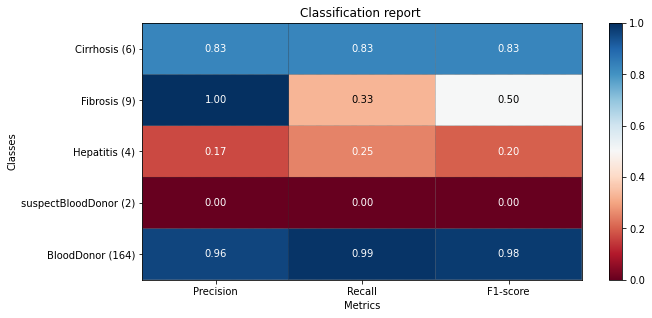

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 452, in <lambda>
    button = tk.Button(frame, text="Classification (Before outlier removal)", fg='steel blue',font=26, command=lambda: classify_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 393, in classify_all
    plot_classify_hcv()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 257, in plot_classify_hcv
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


HCV (no outliers) - Training Completed!!
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

precision    recall  f1-score   support
    
BloodDonor  1.0 1.0 1.0 157
suspectBloodDono

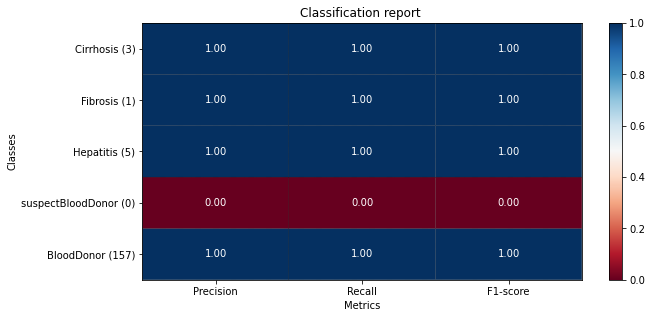

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 455, in <lambda>
    button = tk.Button(frame, text="Classification (after outlier removal)", fg='steel blue',font=26, command=lambda: classify_nooutliers_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 410, in classify_nooutliers_all
    plot_classify_nooutlier_hcv()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 281, in plot_classify_nooutlier_hcv
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: IF
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 440, in <lambda>
    button = tk.Button(frame, text="Isolation Forest",  fg='saddle brown', font=26, command=lambda: IF_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 348, in IF_all
    plot_IF_park()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 210, in plot_IF_park
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: OneClassSVM
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 443, in <lambda>
    button = tk.Button(frame, text="OneClassSVM", fg='saddle brown',font=26, command=lambda: svm_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 364, in svm_all
    plot_svm_park()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 215, in plot_svm_park
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: LOF
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 446, in <lambda>
    button = tk.Button(frame, text="Local Outlier Factor",fg='saddle brown', font=26, command=lambda: lof_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 380, in lof_all
    plot_lof_park()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 220, in plot_lof_park
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Parkinsons - Training Completed!!
Recall Score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        48

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

precision    recall  f1-score   support
    
Healthy  1.0 1.0 1.0 11
Parkinsons  1.0 1.0 1.0 48


[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
plotMat: [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
support: [11, 48]


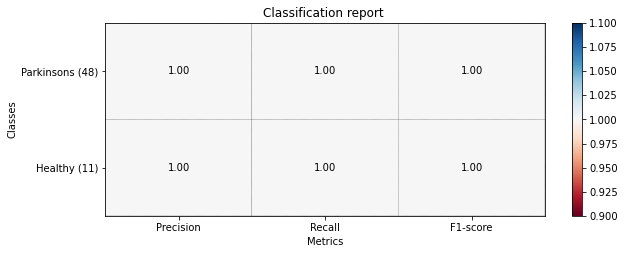

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 452, in <lambda>
    button = tk.Button(frame, text="Classification (Before outlier removal)", fg='steel blue',font=26, command=lambda: classify_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 396, in classify_all
    plot_classify_park()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 263, in plot_classify_park
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Parkinsons (no outliers) - Training Completed!!
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        38

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

precision    recall  f1-score   support
    
Healthy  1.0 1.0 1.0 15
Parkinsons  1.0 1.0 1.0 38


[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
plotMat: [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
support: [15, 38]


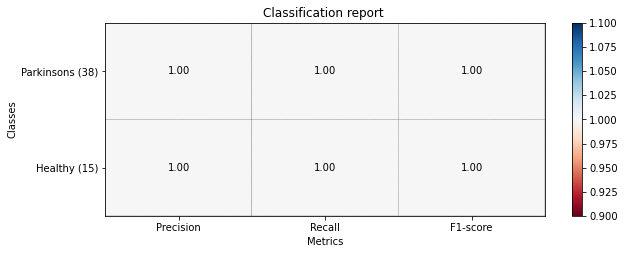

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 455, in <lambda>
    button = tk.Button(frame, text="Classification (after outlier removal)", fg='steel blue',font=26, command=lambda: classify_nooutliers_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 413, in classify_nooutliers_all
    plot_classify_nooutlier_park()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 293, in plot_classify_nooutlier_park
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Parkinsons - Training Completed!!
Recall Score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        41

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

precision    recall  f1-score   support
    
Healthy  1.0 1.0 1.0 18
Parkinsons  1.0 1.0 1.0 41


[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
plotMat: [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
support: [18, 41]


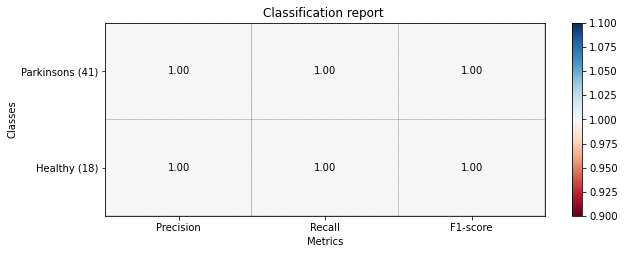

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 452, in <lambda>
    button = tk.Button(frame, text="Classification (Before outlier removal)", fg='steel blue',font=26, command=lambda: classify_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 396, in classify_all
    plot_classify_park()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 263, in plot_classify_park
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: IF
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 440, in <lambda>
    button = tk.Button(frame, text="Isolation Forest",  fg='saddle brown', font=26, command=lambda: IF_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 354, in IF_all
    plot_IF_canc()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 241, in plot_IF_canc
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: OneClassSVM
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 443, in <lambda>
    button = tk.Button(frame, text="OneClassSVM", fg='saddle brown',font=26, command=lambda: svm_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 370, in svm_all
    plot_svm_canc()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 246, in plot_svm_canc
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: LOF
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 446, in <lambda>
    button = tk.Button(frame, text="Local Outlier Factor",fg='saddle brown', font=26, command=lambda: lof_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 386, in lof_all
    plot_lof_canc()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 251, in plot_lof_canc
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Breast Cancer - Training Completed!!
Recall Score : 0.935
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       143
           1       0.92      0.94      0.93        62

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

precision    recall  f1-score   support
    
Malignant  0.97 0.97 0.97 143
Benign  0.92 0.94 0.93 62


[0.97, 0.97, 0.97]
[0.92, 0.94, 0.93]
plotMat: [[0.97, 0.97, 0.97], [0.92, 0.94, 0.93]]
support: [143, 62]


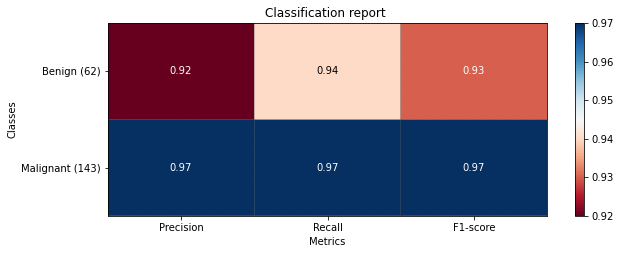

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 452, in <lambda>
    button = tk.Button(frame, text="Classification (Before outlier removal)", fg='steel blue',font=26, command=lambda: classify_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 402, in classify_all
    plot_classify_canc()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 273, in plot_classify_canc
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Breast Cancer (no outliers) - Training Completed!!
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00        59

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

precision    recall  f1-score   support
    
Malignant  1.0 1.0 1.0 126
Benign  1.0 1.0 1.0 59


[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
plotMat: [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
support: [126, 59]


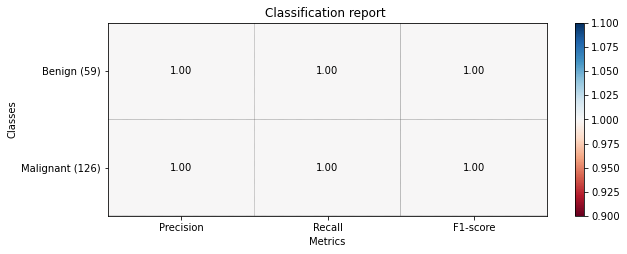

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 455, in <lambda>
    button = tk.Button(frame, text="Classification (after outlier removal)", fg='steel blue',font=26, command=lambda: classify_nooutliers_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 419, in classify_nooutliers_all
    plot_classify_nooutlier_canc()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 299, in plot_classify_nooutlier_canc
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: IF
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 440, in <lambda>
    button = tk.Button(frame, text="Isolation Forest",  fg='saddle brown', font=26, command=lambda: IF_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 351, in IF_all
    plot_IF_liver()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 226, in plot_IF_liver
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: OneClassSVM
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 443, in <lambda>
    button = tk.Button(frame, text="OneClassSVM", fg='saddle brown',font=26, command=lambda: svm_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 367, in svm_all
    plot_svm_liver()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 231, in plot_svm_liver
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Fitting: LOF
Model Fitting Complete


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 446, in <lambda>
    button = tk.Button(frame, text="Local Outlier Factor",fg='saddle brown', font=26, command=lambda: lof_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 383, in lof_all
    plot_lof_liver()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 236, in plot_lof_liver
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Liver - Training Completed!!
Recall Score : 0.929
              precision    recall  f1-score   support

           0       0.55      0.34      0.42        35
           1       0.85      0.93      0.89       140

    accuracy                           0.81       175
   macro avg       0.70      0.64      0.65       175
weighted avg       0.79      0.81      0.79       175

              precision    recall  f1-score   support

           0       0.55      0.34      0.42        35
           1       0.85      0.93      0.89       140

    accuracy                           0.81       175
   macro avg       0.70      0.64      0.65       175
weighted avg       0.79      0.81      0.79       175

precision    recall  f1-score   support
    
Healthy  0.55 0.34 0.42 35
LiverPatient  0.85 0.93 0.89 140


[0.55, 0.34, 0.42]
[0.85, 0.93, 0.89]
plotMat: [[0.55, 0.34, 0.42], [0.85, 0.93, 0.89]]
support: [35, 140]


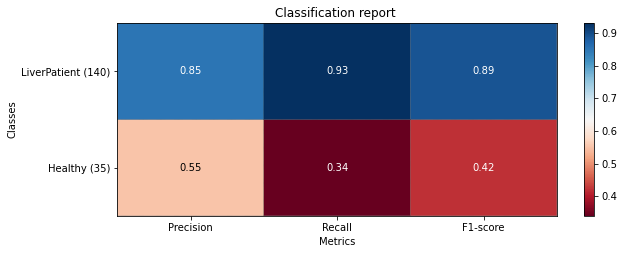

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 452, in <lambda>
    button = tk.Button(frame, text="Classification (Before outlier removal)", fg='steel blue',font=26, command=lambda: classify_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 399, in classify_all
    plot_classify_liver()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 268, in plot_classify_liver
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


Liver (no outliers) - Training Completed!!
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00        46

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

precision    recall  f1-score   support
    
Healthy  0 0 0 0
LiverPatient  1.0 1.0 1.0 114


[0.0, 0.0, 0.0]
[1.0, 1.0, 1.0]
plotMat: [[0.0, 0.0, 0.0], [1.0, 1.0, 1.0]]
support: [0, 114]


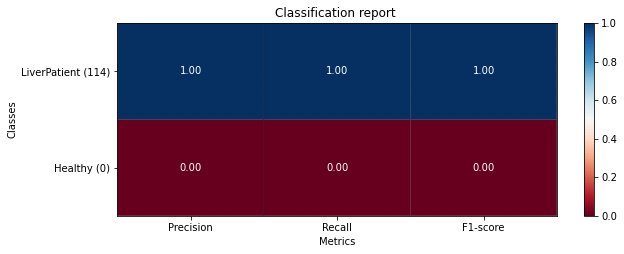

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sjt20\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 455, in <lambda>
    button = tk.Button(frame, text="Classification (after outlier removal)", fg='steel blue',font=26, command=lambda: classify_nooutliers_all())
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 416, in classify_nooutliers_all
    plot_classify_nooutlier_liver()
  File "C:\Users\sjt20\AppData\Local\Temp\ipykernel_7756\267992083.py", line 287, in plot_classify_nooutlier_liver
    canv.pack(fill='both', expand = True)
AttributeError: 'int' object has no attribute 'pack'


In [60]:
if __name__ == "__main__":
    main()